In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

In [20]:
train_path = '../data/train'
os.listdir(train_path)[:5]

['00022e1a.jpg',
 '000466c4.jpg',
 '00087b01.jpg',
 '001296d5.jpg',
 '0014cfdf.jpg']

In [5]:
train_labels_pd = pd.read_csv('{}/train.csv'.format(train_path))
train_labels_pd.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [12]:
train_labels_dict = train_labels_pd.set_index('Image')['Id'].to_dict()
sample_filename = os.listdir(train_path)[0]
print(sample_filename, train_labels_dict[sample_filename])

00022e1a.jpg w_e15442c


In [28]:
def imshow(*images, cmap='jet', rows=None, labels=None):
    """
    Shows image loaded by opencv after inverting the order of channels
    Can also be used to show single layer depth image

    Args:
        *images: one of more np.array of shape h,w,c or simple h,w
        cmap: specify a cmap to apply to all images (jet by default)
    Returns:
        None
        """
    plt.rcParams['image.cmap'] = cmap

    no_of_images = len(images)

    if no_of_images is 1:
        plt.imshow(images[0])
        plt.axis('off')
        return

    if rows is None:
        rows = int(np.sqrt(no_of_images))
    if rows > len(images):
        raise ValueError('Rows can be more than the number of images')
    columns = int(np.ceil(no_of_images / rows))
    
    should_show_labels = True
    if labels is None:
        should_show_labels = False
    elif len(labels) != len(images):
        raise ValueError('Should provide labels with dim same as that of images: {} != {}'.format(len(labels), len(images)))

    fig, axes = plt.subplots(rows, columns)
    for index, axis in enumerate(axes.reshape(-1)):
        if index < no_of_images:
            axis.imshow(images[index])
        if should_show_labels:
            axis.set_title(labels[index])
        axis.axis('off')

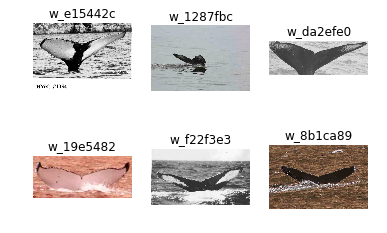

In [29]:
imfiles = []
imlabels = []
for index, filename in enumerate(os.listdir(train_path)):
    imfile = cv2.imread('{}/{}'.format(train_path,filename))
    imfiles.append(imfile)
    imlabels.append(train_labels_dict[filename])
    if index >= 5: break
imshow(*imfiles, labels=imlabels)